<a href="https://colab.research.google.com/github/SrilathaDama/HandWrittenDigit-Recognition/blob/main/Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install numpy pandas matplotlib tensorflow pillow

In [9]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from PIL import Image, ImageOps
import numpy as np
from tensorflow.keras.models import load_model

In [10]:
#Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

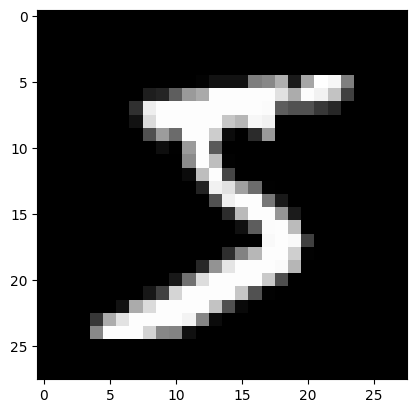

In [12]:
#Display the first image in the training dataset
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [13]:
#Build the model
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
#Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2620 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1163 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0793 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0612 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0469 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0357 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0295 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0206 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.

In [15]:
#Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy * 100: .2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0786 - accuracy: 0.9783
Accuracy:  97.83%


In [16]:
#Function to preprocess the image
def preprocess_image(image_path):
  img = Image.open(image_path).convert('L')
  img = ImageOps.invert(img)
  img = img.resize((28,28))
  img = np.array(img)/255.0
  img = img.reshape(1,28, 28)
  return img


In [17]:
pip install pillow

In [18]:
# Path to the handwritten digit image
image_path = 'Digit.jpg'
new_image = preprocess_image(image_path)

In [19]:
#Predict the image
prediction = model.predict(new_image)
print(f"Predicted digit: {np.argmax(prediction)}")


1/1 [==============================] - 0s 83ms/step
Predicted digit: 5


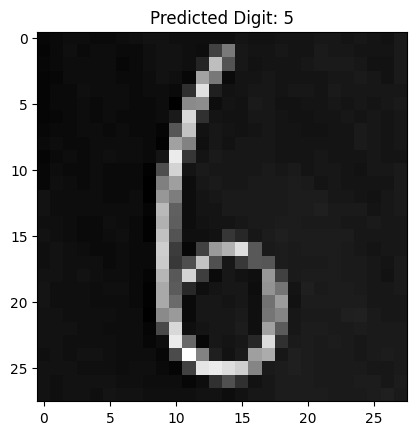

In [20]:
#Display the test image and predicted image
plt.imshow(new_image.reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {np.argmax(prediction)}")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')